In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr

from datetime import datetime, timedelta

import intake
import healpy
# import tobac

In [2]:
import eccodes

In [3]:
eccodes.__version__

'2.34.1'

In [4]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [5]:
cat.IFS['IFS_9-FESOM_5-production']

IFS_9-FESOM_5-production:
  args:
    path: https://data.nextgems-h2020.eu/IFS/tco1279-ng5-production-years.yaml
  description: main 9km scenario (SSP3-7.0), coupled with FESOM 5km
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/IFS


In [6]:
# Have to select decade for hourly 2D data
cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512_2020s']

2D_hourly_healpix512_2020s:
  args:
    consolidated: false
    drop_variables:
    - sst
    - ci
    - 10si
    - 100si
    urlpath:
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2020/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2021/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2022/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2023/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2024/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2025/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2026/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2027/sfc.dir/atm2d.json
    - reference::/work/bm1235/a270046/cyc

In [7]:
# Have to select 5-year period for hourly 2D data
cat.IFS['IFS_9-FESOM_5-production']['3D_hourly_healpix512_2020']

3D_hourly_healpix512_2020:
  args:
    consolidated: false
    urlpath:
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2020/pl.dir/atm3d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2021/pl.dir/atm3d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2022/pl.dir/atm3d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2023/pl.dir/atm3d.json
    - reference::/work/bm1235/a270046/cycle4/gribscan_1h1d_2D_healpix512/jsons.2024.NEW/pl.dir/atm3d.json
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/IFS


In [8]:
cat.IFS['IFS_9-FESOM_5-production']['3D_hourly_healpix512_2020'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 355TB
Dimensions:  (time: 43392, level: 25, value: 3145728)
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * level    (level) int64 200B 1 5 10 20 30 50 70 ... 875 900 925 950 975 1000
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 347kB 2020-01-20 ... 2024-12-31T23:00:00
Dimensions without coordinates: value
Data variables: (12/13)
    cc       (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    ciwc     (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    clwc     (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    crwc     (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    cswc     (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    pv       (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    ...       ...
    r        (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    t        (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    u        (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    v        (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    w        (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
    z        (time, level, value) float64 27TB dask.array<chunksize=(1, 1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [9]:
cat.IFS['IFS_9-FESOM_5-production']['2D_daily_healpix512_ocean'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 2TB
Dimensions:        (time: 8990, value: 3145728)
Coordinates:
    lat            (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon            (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time           (time) datetime64[ns] 72kB 2020-01-21 ... 2045-01-01
Dimensions without coordinates: value
Data variables:
    avg_mlotst125  (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_siconc     (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sisnthick  (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sithick    (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_siue       (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sivn       (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sos        (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_tos        (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_zos        (time, value) float64 226GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [10]:
cat.IFS['IFS_9-FESOM_5-production']['2D_monthly_healpix512'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 430GB
Dimensions:  (time: 300, value: 3145728)
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2kB 2020-02-01 2020-03-01 ... 2045-01-01
Dimensions without coordinates: value
Data variables: (12/57)
    10u      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    chnk     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    e        (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tisr     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tp       (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 8GB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [11]:
cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512_2020s'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 125TB
Dimensions:  (time: 87226, value: 3145728)
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 698kB 2020-01-20 ... 2030-01-01
Dimensions without coordinates: value
Data variables: (12/57)
    10u      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2t       (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    chnk     (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tp       (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tprate   (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [12]:
dataset = cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512_2020s'].to_dask()

/home/b/b382728/miniconda3/envs/tobac/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [13]:
olr = dataset.ttr
olr

<xarray.DataArray 'ttr' (time: 87226, value: 3145728)> Size: 2TB
dask.array<concatenate, shape=(87226, 3145728), dtype=float64, chunksize=(1, 3145728), chunktype=numpy.ndarray>
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 698kB 2020-01-20 ... 2030-01-01
Dimensions without coordinates: value
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [14]:
dataset.tp.isel(time=1000).compute()

<xarray.DataArray 'tp' (value: 3145728)> Size: 25MB
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       7.74785876e-05, 9.82880592e-05, 1.80602074e-04])
Coordinates:
    lat      (value) float64 25MB 0.0746 0.1492 0.1492 ... -0.1492 -0.0746
    lon      (value) float64 25MB 45.0 45.09 44.91 45.0 ... 315.1 314.9 315.0
    time     datetime64[ns] 8B 2020-03-01T16:00:00
Dimensions without coordinates: value
Attributes: (12/14)
    paramId:                    228
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    units:                      m
    name:                       Total precipitation
    cfVarName:                  tp
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

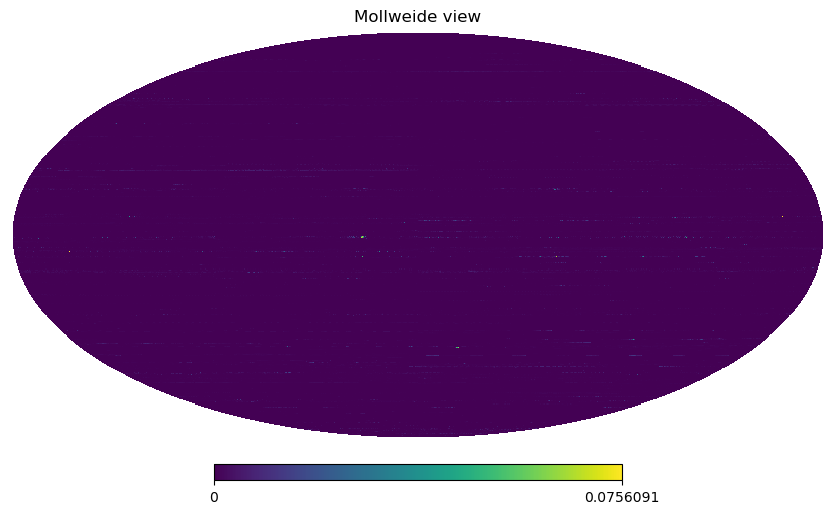

In [15]:
healpy.mollview(dataset.tp.isel(time=1000), flip="geo")#, nest=get_nest(dataset))

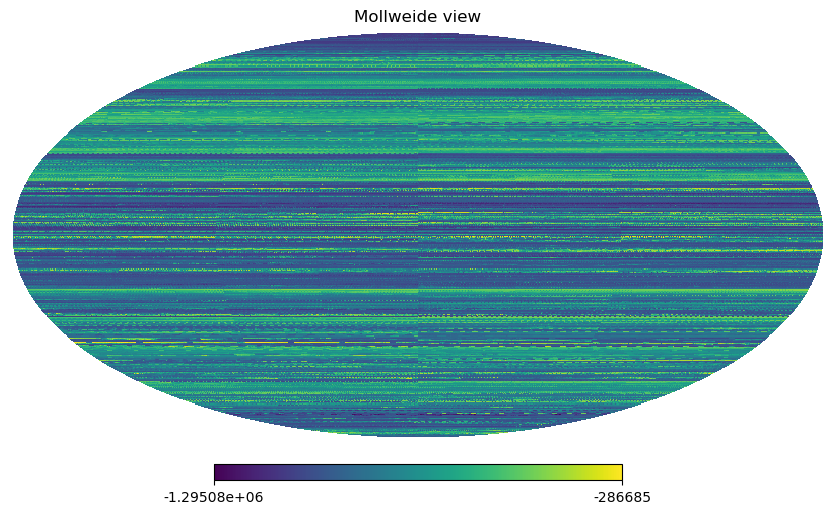

In [16]:
healpy.mollview(dataset.ttr.isel(time=1000))

In [17]:
dataset

<xarray.Dataset> Size: 125TB
Dimensions:  (time: 87226, value: 3145728)
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 698kB 2020-01-20 ... 2030-01-01
Dimensions without coordinates: value
Data variables: (12/57)
    10u      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2t       (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    chnk     (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tp       (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tprate   (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 2TB dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [18]:
lon = xr.DataArray(np.arange(0.05, 360, 0.1), dims=("lon",), name="lon", attrs=dict(units="degrees", standard_name="longitude"))
lat = xr.DataArray(np.arange(89.95, -90, -0.1), dims=("lat",), name="lat", attrs=dict(units="degrees", standard_name="latitude"))

pix = xr.DataArray(
    healpy.ang2pix(512, *np.meshgrid(lon, lat), nest=True, lonlat=True),
    coords=(lat, lon),
)


In [19]:
dataset.ttr.isel(time=1000)

<xarray.DataArray 'ttr' (value: 3145728)> Size: 25MB
dask.array<getitem, shape=(3145728,), dtype=float64, chunksize=(3145728,), chunktype=numpy.ndarray>
Coordinates:
    lat      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 25MB dask.array<chunksize=(3145728,), meta=np.ndarray>
    time     datetime64[ns] 8B 2020-03-01T16:00:00
Dimensions without coordinates: value
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

In [20]:
dataset.ttr.isel(time=1000).drop_vars(["lat", "lon"]).compute().isel(value=pix)

<xarray.DataArray 'ttr' (lat: 1800, lon: 3600)> Size: 52MB
array([[-635642.75  , -635642.75  , -635642.75  , ..., -634230.    ,
        -634230.    , -634230.    ],
       [-634518.875 , -634518.875 , -634518.875 , ..., -632814.8125,
        -632814.8125, -632814.8125],
       [-633171.9375, -633171.9375, -633171.9375, ..., -631687.875 ,
        -631687.875 , -631687.875 ],
       ...,
       [-550873.    , -550873.    , -550873.    , ..., -552847.4375,
        -552847.4375, -552847.4375],
       [-548175.0625, -548175.0625, -548175.0625, ..., -551948.1875,
        -551948.1875, -551948.1875],
       [-545993.125 , -545993.125 , -545993.125 , ..., -547839.5   ,
        -547839.5   , -547839.5   ]])
Coordinates:
    time     datetime64[ns] 8B 2020-03-01T16:00:00
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.7 359.8 359.9 360.0
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

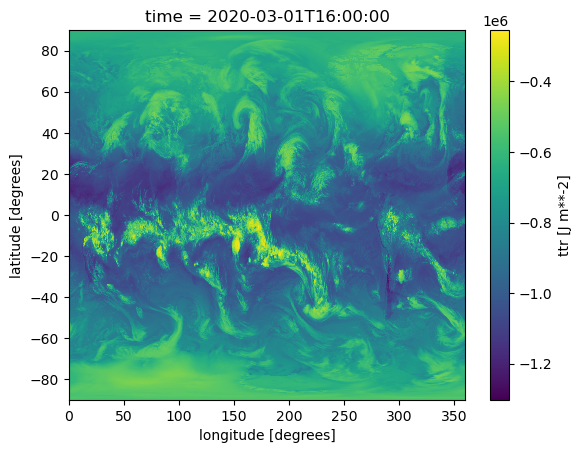

In [21]:
dataset.ttr.isel(time=1000).drop_vars(["lat", "lon"]).compute().isel(value=pix).plot()

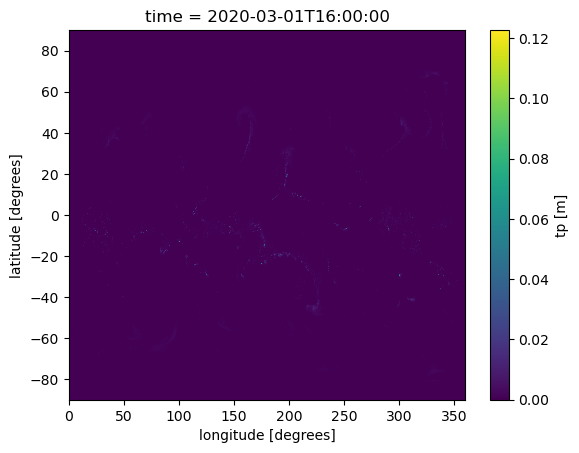

In [22]:
dataset.tp.isel(time=1000).drop_vars(["lat", "lon"]).compute().isel(value=pix).plot()

In [23]:
dataset.ttr.attrs

{'paramId': 179,
 'dataType': 'fc',
 'numberOfPoints': 3145728,
 'typeOfLevel': 'nominalTop',
 'stepUnits': 1,
 'stepType': 'accum',
 'gridType': 'healpix',
 'shortName': 'ttr',
 'units': 'J m**-2',
 'name': 'Top net long-wave (thermal) radiation',
 'cfName': 'toa_outgoing_longwave_flux',
 'cfVarName': 'ttr',
 'missingValue': 9999,
 'NV': 0,
 'gridDefinitionDescription': '150'}

In [24]:
olr = dataset.ttr.isel(time=slice(48,96)).drop_vars(["lat", "lon"]).compute().isel(value=pix) / -3.6e3

In [25]:
olr.attrs = dataset.ttr.attrs
olr.attrs["units"] = "W m**-2"

In [26]:
olr

<xarray.DataArray 'ttr' (time: 48, lat: 1800, lon: 3600)> Size: 2GB
array([[[171.04942708, 171.04942708, 171.04942708, ..., 170.78222222,
         170.78222222, 170.78222222],
        [171.56024306, 171.56024306, 171.56024306, ..., 171.14685764,
         171.14685764, 171.14685764],
        [171.14647569, 171.14647569, 171.14647569, ..., 171.75628472,
         171.75628472, 171.75628472],
        ...,
        [182.82875   , 182.82875   , 182.82875   , ..., 182.88682292,
         182.88682292, 182.88682292],
        [182.71581597, 182.71581597, 182.71581597, ..., 182.82826389,
         182.82826389, 182.82826389],
        [182.62951389, 182.62951389, 182.62951389, ..., 182.61102431,
         182.61102431, 182.61102431]],

       [[171.11788194, 171.11788194, 171.11788194, ..., 170.62751736,
         170.62751736, 170.62751736],
        [171.00291667, 171.00291667, 171.00291667, ..., 171.44626736,
         171.44626736, 171.44626736],
        [170.67564236, 170.67564236, 170.67564236, ..., 171.35746528,
         171.35746528, 171.35746528],
...
        [184.90446181, 184.90446181, 184.90446181, ..., 185.09203125,
         185.09203125, 185.09203125],
        [184.65909722, 184.65909722, 184.65909722, ..., 184.80732639,
         184.80732639, 184.80732639],
        [184.51895833, 184.51895833, 184.51895833, ..., 184.61730903,
         184.61730903, 184.61730903]],

       [[161.84598958, 161.84598958, 161.84598958, ..., 161.12185764,
         161.12185764, 161.12185764],
        [159.53741319, 159.53741319, 159.53741319, ..., 160.26840278,
         160.26840278, 160.26840278],
        [159.01378472, 159.01378472, 159.01378472, ..., 159.1765625 ,
         159.1765625 , 159.1765625 ],
        ...,
        [184.88126736, 184.88126736, 184.88126736, ..., 185.06388889,
         185.06388889, 185.06388889],
        [184.62453125, 184.62453125, 184.62453125, ..., 184.77196181,
         184.77196181, 184.77196181],
        [184.48414931, 184.48414931, 184.48414931, ..., 184.58147569,
         184.58147569, 184.58147569]]])
Coordinates:
  * time     (time) datetime64[ns] 384B 2020-01-22 ... 2020-01-23T23:00:00
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.7 359.8 359.9 360.0
Attributes: (12/15)
    paramId:                    179
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                nominalTop
    stepUnits:                  1
    stepType:                   accum
    ...                         ...
    name:                       Top net long-wave (thermal) radiation
    cfName:                     toa_outgoing_longwave_flux
    cfVarName:                  ttr
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

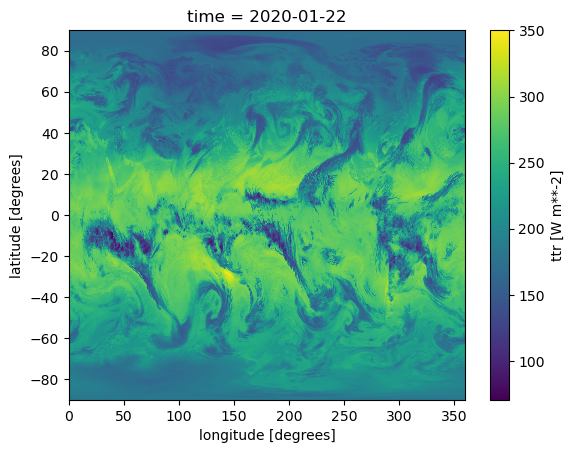

In [27]:
olr[0].plot()

In [28]:
def get_tb(olr):
    """
    This function converts outgoing longwave radiation to brightness temperatures.

    Args:
        olr(xr.DataArray or numpy array): 2D field of model output with OLR

    Returns:
        tb(xr.DataArray or numpy array): 2D field with estimated brightness temperatures
    """
    # constants
    aa = 1.228
    bb = -1.106e-3  # K−1
    # Planck constant
    sigma = 5.670374419e-8  # W⋅m−2⋅K−4

    # flux equivalent brightness temperature
    Tf = (abs(olr) / sigma) ** (1.0 / 4)
    tb = (((aa**2 + 4 * bb * Tf) ** (1.0 / 2)) - aa) / (2 * bb)
    return tb

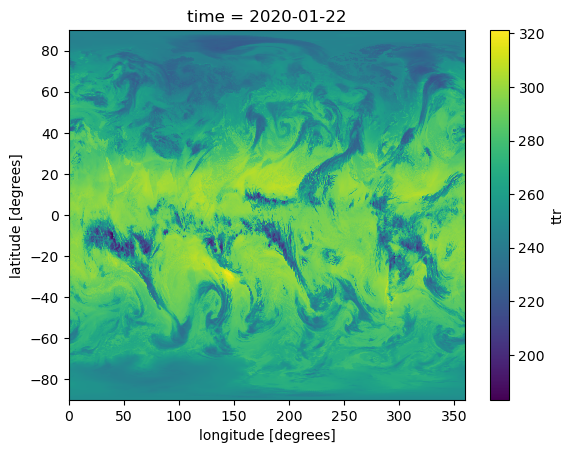

In [29]:
get_tb(olr[0]).plot()